In [1]:
import pandas as pd
import numpy as np
import gini

from util_data import DataSet

# added
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor

import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import normalize

data = DataSet()

In [2]:
# I think we can use panda as an alternative for analysis, since it helps us gain more insights into the data

train = data.get_training_set()
test = data.get_testing_set()

## Finding the best model

Let's try a few models with standard parameters to find the best regressor

In [3]:
ListOfFunction = [LogisticRegression,AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor]

In [4]:
# separate data and label
X = train.drop(['id','target'],axis=1) # drop id and target from X, since "id" wouldn't do much help for prediction
Y = train['target'].as_matrix()

We take a training set of size 200 000 (more than 30% of the set)

LogisticRegression
Gini: -0.003, Max. Gini: 0.482, Normalized Gini: -0.007


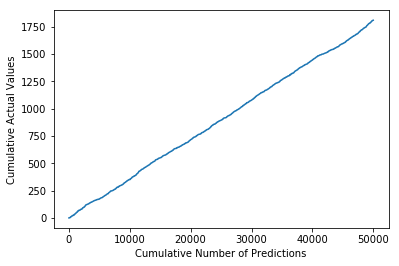

AdaBoostRegressor
Gini: 0.081, Max. Gini: 0.482, Normalized Gini: 0.168


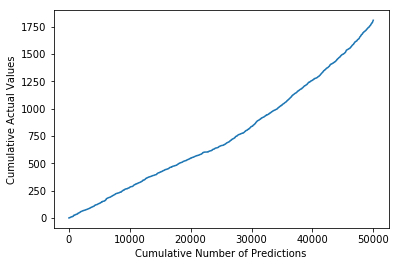

BaggingRegressor
Gini: 0.034, Max. Gini: 0.482, Normalized Gini: 0.070


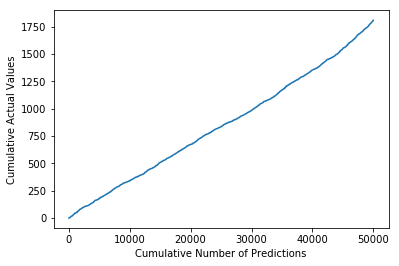

GradientBoostingRegressor
Gini: 0.119, Max. Gini: 0.482, Normalized Gini: 0.247


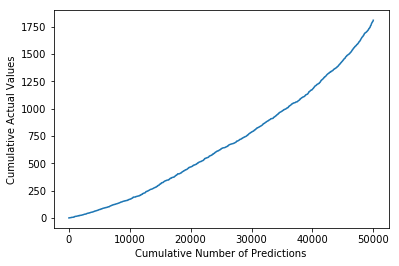

RandomForestRegressor
Gini: 0.031, Max. Gini: 0.482, Normalized Gini: 0.065


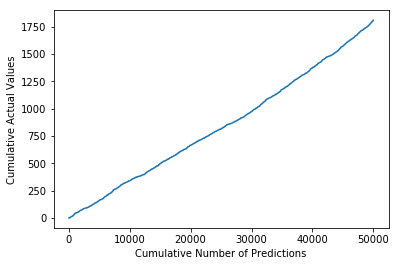

In [5]:
for func in ListOfFunction:
    rfc = func()
    rfc.fit(X[:200000],Y[:200000])
    Y_pred = rfc.predict(X[-50000:])
    print(func.__name__)
    gini.gini_visualization(Y[-50000:],Y_pred,True)

Clearly Gradient Boosting seems best by now

## Test on Gradient Boosting

Let's try to remove some unuseful features

RandomForestRegressor
Gini: 0.119, Max. Gini: 0.482, Normalized Gini: 0.247


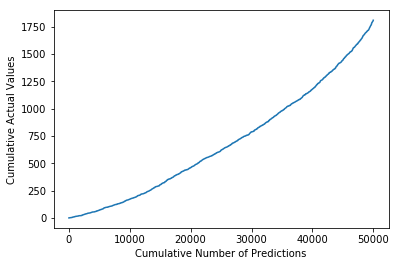

0.24706839584875839

In [6]:
# When there is calc we remove (see first_examples notebook)
customX = X.drop(X.filter(like='calc').columns,axis=1)

rfc = GradientBoostingRegressor()
rfc.fit(X[:200000],Y[:200000])
Y_pred = rfc.predict(X[-50000:])
print(func.__name__)
gini.gini_visualization(Y[-50000:],Y_pred,True)

Let's make change in the number of estimators

In [7]:
# When there is calc we remove (see first_examples notebook)
customX = X.drop(X.filter(like='calc').columns,axis=1)

numbers = [10,20,40,60,80,100,150,200,300,400,500]
results = []

for i in numbers:
    rfc = GradientBoostingRegressor(n_estimators = i)
    rfc.fit(X[:200000],Y[:200000])
    Y_pred = rfc.predict(X[-50000:])
    print(func.__name__ + " for "+str(i)+" classifiers")
    results.append(gini.gini_visualization(Y[-50000:],Y_pred,False))

RandomForestRegressor for 10 classifiers
Gini: 0.107, Max. Gini: 0.482, Normalized Gini: 0.221
RandomForestRegressor for 20 classifiers
Gini: 0.111, Max. Gini: 0.482, Normalized Gini: 0.231
RandomForestRegressor for 40 classifiers
Gini: 0.115, Max. Gini: 0.482, Normalized Gini: 0.239
RandomForestRegressor for 60 classifiers
Gini: 0.117, Max. Gini: 0.482, Normalized Gini: 0.243
RandomForestRegressor for 80 classifiers
Gini: 0.119, Max. Gini: 0.482, Normalized Gini: 0.246
RandomForestRegressor for 100 classifiers
Gini: 0.119, Max. Gini: 0.482, Normalized Gini: 0.247
RandomForestRegressor for 150 classifiers
Gini: 0.120, Max. Gini: 0.482, Normalized Gini: 0.249
RandomForestRegressor for 200 classifiers
Gini: 0.120, Max. Gini: 0.482, Normalized Gini: 0.248
RandomForestRegressor for 300 classifiers
Gini: 0.119, Max. Gini: 0.482, Normalized Gini: 0.248
RandomForestRegressor for 400 classifiers
Gini: 0.119, Max. Gini: 0.482, Normalized Gini: 0.247
RandomForestRegressor for 500 classifiers
Gin

Summary


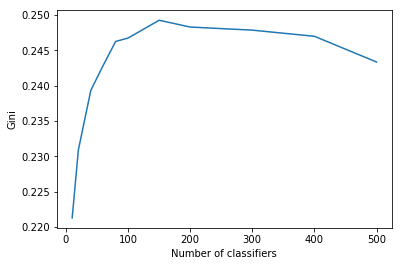

In [8]:
print("Summary")
plt.plot(numbers,results)
plt.xlabel('Number of classifiers')
plt.ylabel('Gini')
plt.show()

## More precised tests

Try with unuseful features and normalization

In [9]:
#Case 1 : Feature removal + Normalization
customX = X.drop(X.filter(like='calc').columns,axis=1)
customX = normalize(customX)

numbers = [60,80,100,150]
results = []

for i in numbers:
    rfc = GradientBoostingRegressor(n_estimators = i)
    rfc.fit(customX[:200000],Y[:200000])
    Y_pred = rfc.predict(customX[-50000:])
    print(func.__name__ + " for "+str(i)+" classifiers")
    results.append(gini.gini_visualization(Y[-50000:],Y_pred,False))

RandomForestRegressor for 60 classifiers
Gini: 0.112, Max. Gini: 0.482, Normalized Gini: 0.233
RandomForestRegressor for 80 classifiers
Gini: 0.113, Max. Gini: 0.482, Normalized Gini: 0.235
RandomForestRegressor for 100 classifiers
Gini: 0.114, Max. Gini: 0.482, Normalized Gini: 0.237
RandomForestRegressor for 150 classifiers
Gini: 0.114, Max. Gini: 0.482, Normalized Gini: 0.236


In [10]:
# Case 2 : No feature removal + Normalization
customX = normalize(X)

numbers = [60,80,100,150] # these seems to be the best parameters
results = []

for i in numbers:
    rfc = GradientBoostingRegressor(n_estimators = i)
    rfc.fit(customX[:200000],Y[:200000])
    Y_pred = rfc.predict(customX[-50000:])
    print(func.__name__ + " for "+str(i)+" classifiers")
    results.append(gini.gini_visualization(Y[-50000:],Y_pred,False))

RandomForestRegressor for 60 classifiers
Gini: 0.114, Max. Gini: 0.482, Normalized Gini: 0.237
RandomForestRegressor for 80 classifiers
Gini: 0.116, Max. Gini: 0.482, Normalized Gini: 0.241
RandomForestRegressor for 100 classifiers
Gini: 0.116, Max. Gini: 0.482, Normalized Gini: 0.241
RandomForestRegressor for 150 classifiers
Gini: 0.117, Max. Gini: 0.482, Normalized Gini: 0.242


In [11]:
# Case 3 : Feature removal + No normalization
customX = X.drop(X.filter(like='calc').columns,axis=1)

numbers = [60,80,100,150]
results = []

for i in numbers:
    rfc = GradientBoostingRegressor(n_estimators = i)
    rfc.fit(customX[:200000],Y[:200000])
    Y_pred = rfc.predict(customX[-50000:])
    print(func.__name__ + " for "+str(i)+" classifiers")
    results.append(gini.gini_visualization(Y[-50000:],Y_pred,False))

RandomForestRegressor for 60 classifiers
Gini: 0.119, Max. Gini: 0.482, Normalized Gini: 0.246
RandomForestRegressor for 80 classifiers
Gini: 0.120, Max. Gini: 0.482, Normalized Gini: 0.248
RandomForestRegressor for 100 classifiers
Gini: 0.121, Max. Gini: 0.482, Normalized Gini: 0.252
RandomForestRegressor for 150 classifiers
Gini: 0.123, Max. Gini: 0.482, Normalized Gini: 0.255


In [12]:
# Case 4 : No feature removal, no normalization
customX = X

numbers = [60,80,100,150]
results = []

for i in numbers:
    rfc = GradientBoostingRegressor(n_estimators = i)
    rfc.fit(customX[:200000],Y[:200000])
    Y_pred = rfc.predict(customX[-50000:])
    print(func.__name__ + " for "+str(i)+" classifiers")
    results.append(gini.gini_visualization(Y[-50000:],Y_pred,False))

RandomForestRegressor for 60 classifiers
Gini: 0.117, Max. Gini: 0.482, Normalized Gini: 0.243
RandomForestRegressor for 80 classifiers
Gini: 0.118, Max. Gini: 0.482, Normalized Gini: 0.245
RandomForestRegressor for 100 classifiers
Gini: 0.119, Max. Gini: 0.482, Normalized Gini: 0.247
RandomForestRegressor for 150 classifiers
Gini: 0.120, Max. Gini: 0.482, Normalized Gini: 0.249


## More features removal ?

In [13]:
correlated_features = ["ps_reg_03","ps_car_13"]
lacunar_features = ["ps_car_03_cat","ps_car_05_cat"]
func = GradientBoostingRegressor

In [14]:
customX = X.drop(X.filter(like='calc').columns,axis=1).drop(correlated_features,axis=1)

numbers = [60,80,100,150,200]
results = []

for i in numbers:
    rfc = GradientBoostingRegressor(n_estimators = i)
    rfc.fit(customX[:200000],Y[:200000])
    Y_pred = rfc.predict(customX[-50000:])
    print(func.__name__ + " for "+str(i)+" classifiers")
    results.append(gini.gini_visualization(Y[-50000:],Y_pred,False))

GradientBoostingRegressor for 60 classifiers
Gini: 0.118, Max. Gini: 0.482, Normalized Gini: 0.244
GradientBoostingRegressor for 80 classifiers
Gini: 0.120, Max. Gini: 0.482, Normalized Gini: 0.249
GradientBoostingRegressor for 100 classifiers
Gini: 0.121, Max. Gini: 0.482, Normalized Gini: 0.252
GradientBoostingRegressor for 150 classifiers
Gini: 0.123, Max. Gini: 0.482, Normalized Gini: 0.255
GradientBoostingRegressor for 200 classifiers
Gini: 0.123, Max. Gini: 0.482, Normalized Gini: 0.255


In [15]:
customX = X.drop(X.filter(like='calc').columns,axis=1).drop(lacunar_features,axis=1)

numbers = [60,80,100,150,200]
results = []

for i in numbers:
    rfc = GradientBoostingRegressor(n_estimators = i)
    rfc.fit(customX[:200000],Y[:200000])
    Y_pred = rfc.predict(customX[-50000:])
    print(func.__name__ + " for "+str(i)+" classifiers")
    results.append(gini.gini_visualization(Y[-50000:],Y_pred,False))

GradientBoostingRegressor for 60 classifiers
Gini: 0.118, Max. Gini: 0.482, Normalized Gini: 0.244
GradientBoostingRegressor for 80 classifiers
Gini: 0.119, Max. Gini: 0.482, Normalized Gini: 0.247
GradientBoostingRegressor for 100 classifiers
Gini: 0.121, Max. Gini: 0.482, Normalized Gini: 0.250
GradientBoostingRegressor for 150 classifiers
Gini: 0.123, Max. Gini: 0.482, Normalized Gini: 0.255
GradientBoostingRegressor for 200 classifiers
Gini: 0.122, Max. Gini: 0.482, Normalized Gini: 0.254


In [16]:
customX = X.drop(X.filter(like='calc').columns,axis=1).drop(correlated_features,axis=1).drop(lacunar_features,axis=1)

numbers = [60,80,100,150,200]
results = []

for i in numbers:
    rfc = GradientBoostingRegressor(n_estimators = i)
    rfc.fit(customX[:200000],Y[:200000])
    Y_pred = rfc.predict(customX[-50000:])
    print(func.__name__ + " for "+str(i)+" classifiers")
    results.append(gini.gini_visualization(Y[-50000:],Y_pred,False))

GradientBoostingRegressor for 60 classifiers
Gini: 0.118, Max. Gini: 0.482, Normalized Gini: 0.246
GradientBoostingRegressor for 80 classifiers
Gini: 0.119, Max. Gini: 0.482, Normalized Gini: 0.247
GradientBoostingRegressor for 100 classifiers
Gini: 0.122, Max. Gini: 0.482, Normalized Gini: 0.252
GradientBoostingRegressor for 150 classifiers
Gini: 0.123, Max. Gini: 0.482, Normalized Gini: 0.256
GradientBoostingRegressor for 200 classifiers
Gini: 0.123, Max. Gini: 0.482, Normalized Gini: 0.254


More and More ?

In [17]:
customX = X.drop(X.filter(like='calc').columns,axis=1).drop(correlated_features,axis=1)
disbalance = []

for col in customX.filter(like='bin').columns:
    if(train[[col,'id']].groupby([col], as_index=False).count().loc[1]['id']< 20000 or train[[col,'id']].groupby([col], as_index=False).count().loc[0]['id']< 20000):
        print(col)
        disbalance.append(col)

ps_ind_10_bin
ps_ind_11_bin
ps_ind_12_bin
ps_ind_13_bin


In [18]:
customX = X.drop(X.filter(like='calc').columns,axis=1).drop(correlated_features,axis=1).drop(lacunar_features,axis=1).drop(disbalance,axis=1)

numbers = [60,80,100,150,200]
results = []

for i in numbers:
    rfc = GradientBoostingRegressor(n_estimators = i)
    rfc.fit(customX[:200000],Y[:200000])
    Y_pred = rfc.predict(customX[-50000:])
    print(func.__name__ + " for "+str(i)+" classifiers")
    results.append(gini.gini_visualization(Y[-50000:],Y_pred,False))

GradientBoostingRegressor for 60 classifiers
Gini: 0.118, Max. Gini: 0.482, Normalized Gini: 0.246
GradientBoostingRegressor for 80 classifiers
Gini: 0.120, Max. Gini: 0.482, Normalized Gini: 0.248
GradientBoostingRegressor for 100 classifiers
Gini: 0.122, Max. Gini: 0.482, Normalized Gini: 0.253
GradientBoostingRegressor for 150 classifiers
Gini: 0.124, Max. Gini: 0.482, Normalized Gini: 0.257
GradientBoostingRegressor for 200 classifiers
Gini: 0.124, Max. Gini: 0.482, Normalized Gini: 0.256


In [19]:
customX = X.drop(X.filter(like='calc').columns,axis=1).drop(correlated_features,axis=1).drop(lacunar_features,axis=1).drop(disbalance,axis=1)
disbalance2 = []

for col in X.filter(like='cat').columns:
    if(max(train[[col,'id']].groupby([col], as_index=False).count().id)>510000):
        print(col)
        disbalance2.append(col)

ps_ind_05_cat
ps_car_07_cat
ps_car_10_cat


In [39]:
customX = X.drop(X.filter(like='calc').columns,axis=1).drop(correlated_features,axis=1).drop(lacunar_features,axis=1).drop(disbalance,axis=1)

numbers = [150]
results = []

for i in numbers:
    rfc = GradientBoostingRegressor(n_estimators = i)
    rfc.fit(customX,Y)
    Y_pred = rfc.predict(customX)
    print(func.__name__ + " for "+str(i)+" classifiers")
    results.append(gini.gini_visualization(Y,Y_pred,False))

GradientBoostingRegressor for 150 classifiers
Gini: 0.143, Max. Gini: 0.482, Normalized Gini: 0.297


In [40]:
res = []
testX = test.drop(["id"],axis=1).drop(X.filter(like='calc').columns,axis=1).drop(correlated_features,axis=1).drop(lacunar_features,axis=1).drop(disbalance,axis=1)
Y_pred = rfc.predict(testX)

k=0
for i,p in zip(test.id, Y_pred):
    res.append([i,max(0,p)])
    
pd.DataFrame(res,columns=["id","target"]).to_csv("prediction.csv",index = False)


In [32]:
res

array([ 0.0317773 ,  0.02833168,  0.02325121, ...,  0.03482519,
        0.0237027 ,  0.03120357])